## Project Runner

### I. Import packages

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay


""" 
9.3% of the population in the United States have diabetes , 28%
The cost of misclassification is high

"""


"""
TODO:

"""

'\nTODO:\n\n'

In [31]:
#read in clean data
csv_filename = 'dataset/clean_diabetic_dataset.csv'
df = pd.read_csv(csv_filename)

X_train, X_test, y_train, y_test = train_test_split(df.drop("readmitted",axis=1),
df[["readmitted"]],test_size=0.2, shuffle=True)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
13019,2,1,85,5,2,9,3,22,1,23,3,0,0,0,0,0,6,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
64316,3,0,75,1,1,7,5,53,1,20,0,0,0,0,7,3,9,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
66847,1,1,45,1,1,7,2,29,6,6,0,0,0,0,1,7,4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
35971,2,1,75,1,1,7,1,11,1,14,0,0,0,9,0,0,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45927,2,1,85,1,1,7,2,43,1,6,0,0,0,7,6,0,7,0,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16592,2,1,45,5,18,9,2,23,0,12,0,0,0,9,9,1,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1
68533,2,1,55,5,18,1,4,60,4,25,0,0,0,0,1,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1
38961,2,1,45,1,1,7,5,63,2,10,0,0,1,7,3,0,9,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1
52137,3,0,45,1,1,7,5,64,0,34,0,0,0,9,9,7,9,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', None)
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.width')

### II. Data Cleanning and Setup

In [5]:
# Copy code from cleaner.ipynb 
# OR import clean .csv produced from cleaner

# Split data into trainning-validation-test

### III. Trainning

In [7]:
# Implement ML classifiers

# May include experiments of tunning hyperparameters

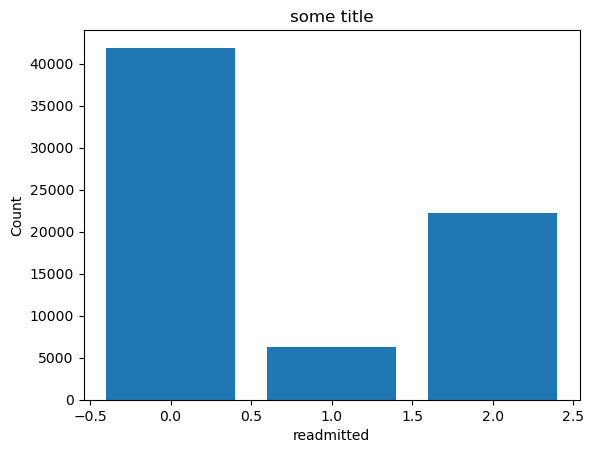

In [13]:
#visualize
def plot_count(colName,xLabel,title):
    # Count the number of occurrences for each unique value in colName
    value_counts = df[colName].value_counts()
    
    # Create a bar graph using matplotlib
    plt.bar(value_counts.index,value_counts.values)
    
    # Set labels and title for the graph
    plt.xlabel(xLabel)
    plt.ylabel('Count')
    plt.title(title)

    # Display the graph
    plt.show()
    

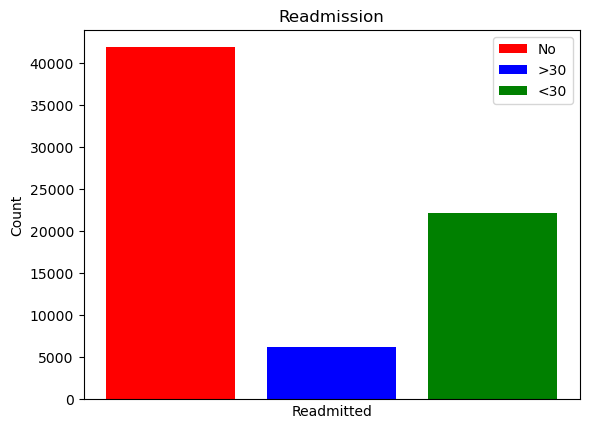

In [18]:
#bar graph for readmission

# Define the x and y data
# y = [0,0,0,0,1,2,1,2]


# Count the occurrences for each unique value
unique_values, counts = np.unique(df['readmitted'], return_counts=True)


x_labels = ['No', '>30', '<30']

colors = ['red', 'blue', 'green']

bars = plt.bar(x_labels, counts,color=colors,label=x_labels)

#remove the text bellow each bar
plt.xticks([])

    
# Set labels and title for the graph
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Readmission')


# Create a legend for the bars

plt.legend()

# Display the graph
plt.show()

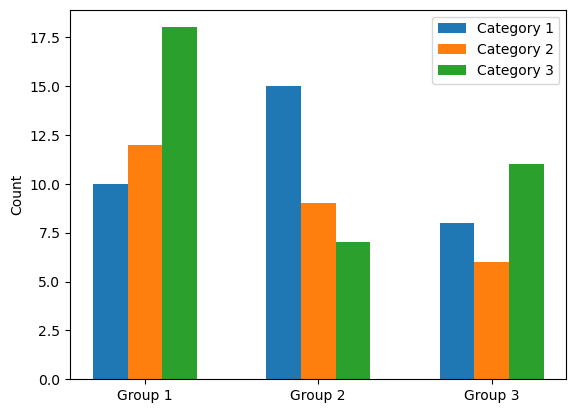

In [13]:
# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
group_names = ['Group 1', 'Group 2', 'Group 3']
counts = np.array([[10, 15, 8],
                   [12, 9, 6],
                   [18, 7, 11]])

# Determine the width of each bar and the positions of the groups
bar_width = 0.2
group_positions = np.arange(len(group_names))

# Plot the bars for each category
for i, category in enumerate(categories):
    bar_positions = group_positions + (i * bar_width)
    plt.bar(bar_positions, counts[i], width=bar_width, label=category)

# Set the x-axis tick positions and labels
plt.xticks(group_positions + bar_width * (len(categories) - 1) / 2, group_names)

# Set the y-axis label
plt.ylabel('Count')

# Add a legend
plt.legend()

# Show the plot
plt.show()


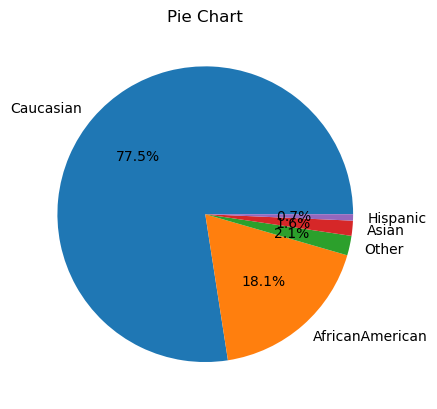

In [54]:
category_counts = df['race'].value_counts()
proportions = category_counts / len(df)
labels = ['Caucasian' ,'AfricanAmerican' ,'Other', 'Asian', 'Hispanic']
explode = (0, 0, 0, 0,0)  # To highlight a slice, you can use the explode parameter

# Plot the pie chart
plt.pie(proportions, explode=explode, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Pie Chart')

# Show the plot
plt.show()



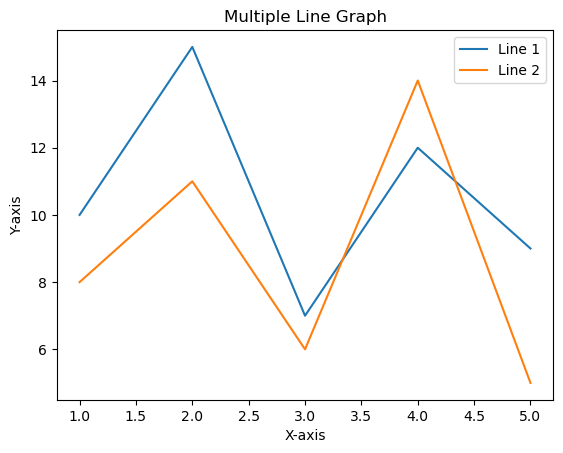

In [20]:
# Sample data
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 7, 12, 9]
y2 = [8, 11, 6, 14, 5]

# Plot the lines
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Graph')

# Add a legend
plt.legend()

# Show the plot
plt.show()


knn

/Users/albert/miniconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: n_features must be equal to 2. Got 44 instead.

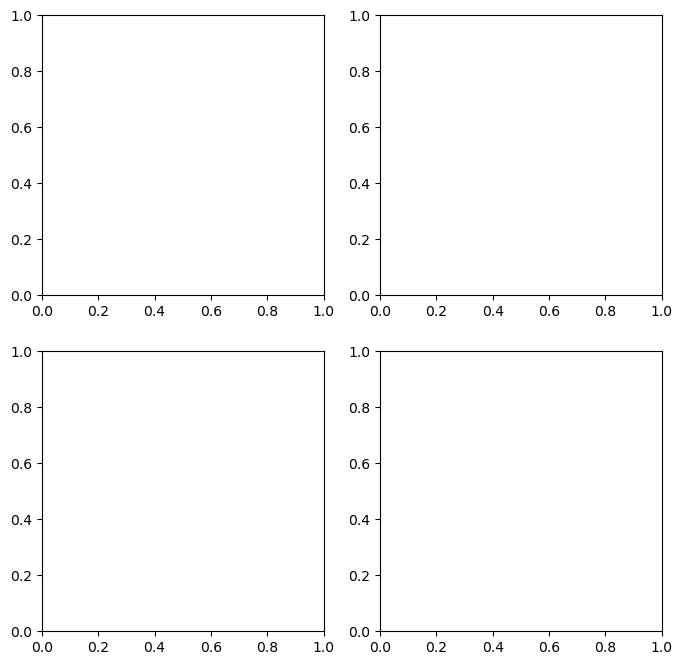

In [23]:
#code from hw2

# Some keyword arguments for making nice looking plots.
# Feel free to change grid_resolution to a higher number -- this results in better looking plots,
# but may result in your code running more slowly.
plot_kwargs = {'cmap': 'viridis',
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}

figure, axes = plt.subplots(2, 2, figsize=(8, 8))

X_train, X_test, y_train, y_test

for i,k in enumerate([1,5,10,50]):
    x =  i%2
    y =  i//2 
    knnClassifier = KNeighborsClassifier(n_neighbors = k)
    knnClassifier.fit(X_train,y_train)
    DecisionBoundaryDisplay.from_estimator(knnClassifier,
                                X_train,ax = axes[x,y],**plot_kwargs)
    le = LabelEncoder()
    le.fit(y_train)
    axes[x,y].scatter(X_train,
                      y_train,
        c = le.transform(y_train,cmap = 'viridis'))

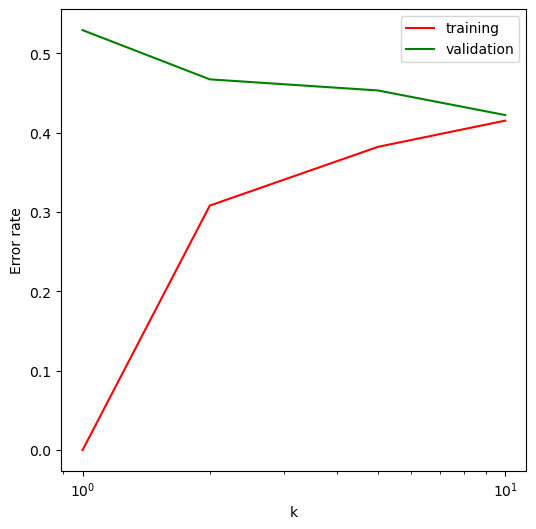

In [29]:
# tuning hyperparameter k
figure, axes = plt.subplots(1, figsize=(6, 6))
### YOUR CODE STARTS HERE ###
training = []
validation = []

for i,k in enumerate([1,2,5,10]):
    knnClassifier = KNeighborsClassifier(n_neighbors = k)
    knnClassifier.fit(X_train,y_train)
    y_pred = knnClassifier.predict(X_train[:1000])
    training.append(1-accuracy_score(y_pred,y_train[:1000]))
    
    y_pred = knnClassifier.predict(X_test[:1000])
    validation.append(1-accuracy_score(y_pred,y_test[:1000]))

axes.set_xscale('log')
axes.set_xlabel("k")
axes.set_ylabel("Error rate")
axes.plot([1,2,5,10],training,'red',label = "training")
axes.plot([1,2,5,10],validation,'green',label = "validation")
axes.legend()

        
### YOUR CODE ENDS HERE ###

logistic

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

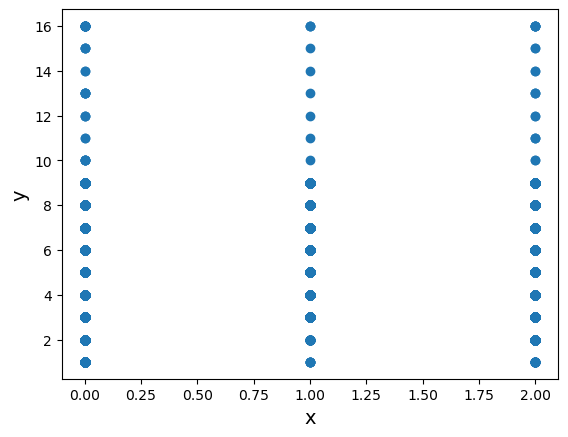

In [48]:
def plot_data(x, y):
    # Make a figure with 1 subplot
    fig, axes = plt.subplots()

    axes.scatter(x, y)

    axes.set_xlabel('x', fontsize=14)
    axes.set_ylabel('y', fontsize=14)
    
    
    return fig, axes

plot_data(df["readmitted"],df["number_diagnoses"])

In [57]:
# TODO tune parameters
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear',fit_intercept = True)
lr.fit(X_train,y_train)

test_predictions = lr.predict(X_train)
test_accuracy =  accuracy_score(y_train,test_predictions)
print(test_accuracy)

test_predictions = lr.predict(X_test)
test_accuracy =  accuracy_score(y_test,test_predictions)
print(test_accuracy)

0.583
0.6097820685738624


In [ ]:
#neural network

### IV. Testing and Graph